 # Week 4 project using titatic data set

### Titanic rescue prediction using Decision Tree, SVM, Logistic Regression, Random Forest and KNN

 

In [66]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# PART 1: Data Handling

In [67]:
data=pd.read_csv("titanic.csv")

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#Using drop function to exclude collums I won't need. The parameter inplace true will change the table 
data.drop(["PassengerId", "Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"], axis="columns",inplace=True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [70]:
# To define X I can simply drop the collumn I don't need, which is the Y 
# Here I am not using the parameter inplace, thus it is automaticaly set as "False" and doesn't change the table
X = data.drop(["Survived"],axis="columns")
# For the variable Y I can simply select the column Survived 
Y = data["Survived"] #Another way to declare: Y = data.Survived 
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
#The next step: create a pattern
#Pattern: Male = 0 / Female = 1
#This method map will create synonims in a dictionary
X.Sex = X.Sex.map({"male":0,"female":1})
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [72]:
#Some filles with the ages are empy. Checkin out the first 10 lines
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [73]:
# To fix this, we will use method fillna(). Inside the brackets I'll put the information to replace, which will be the mean
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]
#Index 5 was empty and is now showing the mean (29.699118)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [74]:
#Now want data to training (80%) and testing (20%) 
#Sklearn has a method to automaticaly make this division"train_test_split"
#Parameters: X, Y, percentage. If I put one, the method will automaticaly calculate the other 
train_test_split(X,Y,train_size = 0.8) # It is automaticaly setting 0.2 for testing
# The table will show X_training [712 rows x 3 columns], X_test [179 rows x 3 columns], Y_training[Length: 712, Y_test[Length: 179]

[     Pclass  Sex        Age
 163       3    0  17.000000
 181       2    0  29.699118
 56        2    1  21.000000
 518       2    1  36.000000
 188       3    0  40.000000
 ..      ...  ...        ...
 699       3    0  42.000000
 596       2    1  29.699118
 316       2    1  24.000000
 232       2    0  59.000000
 461       3    0  34.000000
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 255       3    1  29.000000
 859       3    0  29.699118
 652       3    0  21.000000
 769       3    0  32.000000
 283       3    0  19.000000
 ..      ...  ...        ...
 170       1    0  61.000000
 563       3    0  29.699118
 444       3    0  29.699118
 719       3    0  33.000000
 744       3    0  31.000000
 
 [179 rows x 3 columns],
 163    0
 181    0
 56     1
 518    1
 188    0
       ..
 699    0
 596    1
 316    1
 232    0
 461    0
 Name: Survived, Length: 712, dtype: int64,
 255    1
 859    0
 652    0
 769    0
 283    1
       ..
 170    0
 563    0
 444    1
 719  

In [75]:
# Now I create 4 variables to place each parameter
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)
#to see the lenght:
len(X_train)

712

In [76]:
len(X_test)

179

In [77]:
#Note that X_test is not in order. It presents it ramdomly to prevent model from becoming biased 
X_test

,Pclass,Sex,Age
667,3,0,29.699118
761,3,0,41.000000
106,3,1,21.000000
773,3,0,29.699118
11,1,1,58.000000
...,...,...,...
639,3,0,29.699118
445,1,0,4.000000
812,2,0,35.000000
851,3,0,74.000000


# PART 2: Data Analysis  
* 2.1. Decision Tree
* 2.2. Logistic Regression
* 2.3. SVM (SVC)
* 2.4. Random Forest 
* 2.5. KNN 


# PART 2.1. Decision Tree   

In [206]:
#If it is empty it will create it with as many levels it can. TO avoid this we put max_dep to determine how many levels we want
#The sext parameter will be the criteria. If I dont put it will use gini. If I wanted to use entropy I'd have to put it. I want to use gini, so I don't need to put it
model_dt = tree.DecisionTreeClassifier(max_depth=3)   #model with deph 3
model_dt

DecisionTreeClassifier(max_depth=3)

In [207]:
#Now the method fit will adjust data, trainning the model
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [208]:
#Using predict method to test the model
model_dt.predict(X_test) #always gets x and retuns y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [209]:
#Storing the result in a variable 
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [210]:
#Dataframe to show Y real and Y predicted:
#Using a dictionary to separate columns  
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred})
result

,Survided REAL,Survived PREDICTION
667,0,0
761,0,0
106,1,1
773,0,0
11,1,1
...,...,...
639,0,0
445,1,0
812,0,0
851,0,0


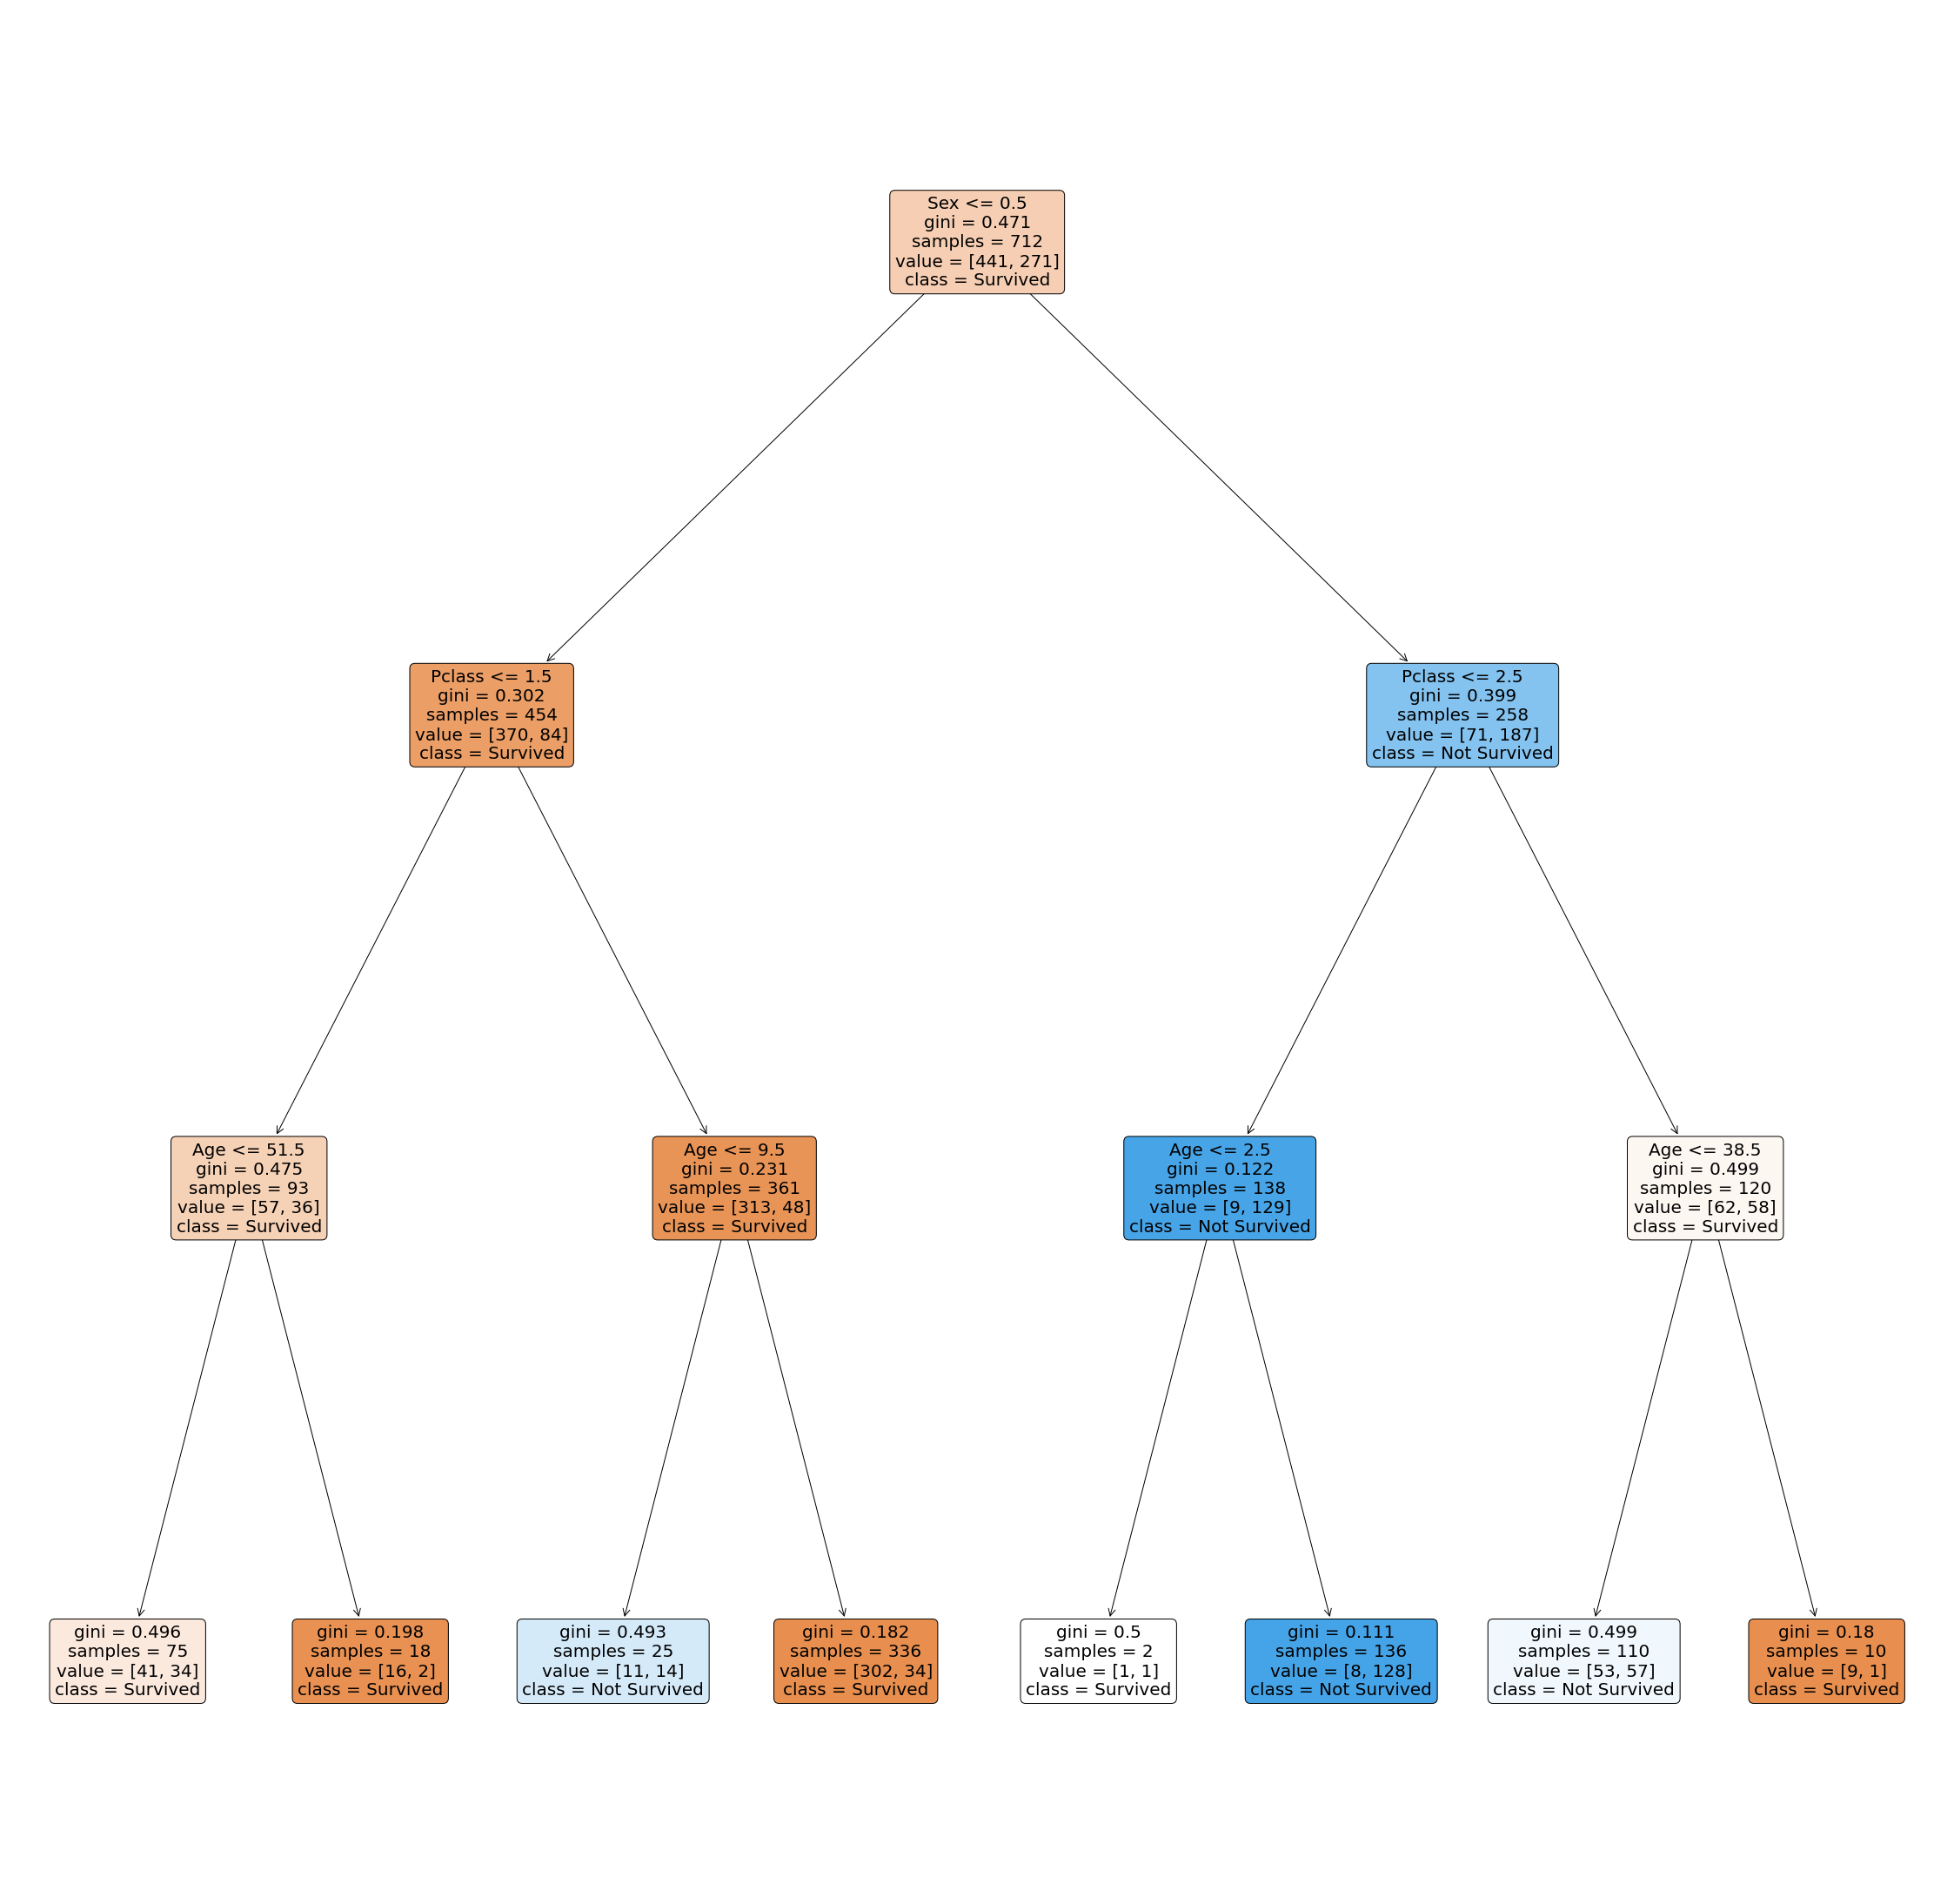

In [211]:
# Plotting the tree
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

 ## Decision Tree - Performance Measurement

#### a) Accuracy

In [212]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_dt = model_dt.score(X_test,Y_real)  
accuracy_dt

0.8212290502793296

In [214]:
# Here is another way to find the accuracy score
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
accuracy

0.8212290502793296

#### b) Precision

In [215]:
# Precision = true positive / true positive + false positive
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.8305084745762712

#### c) Recall

In [216]:
# Recall = true positive / true positive + false negative
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt

0.6901408450704225

#### d) Confusion matrix

In [218]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[98, 10],
       [22, 49]], dtype=int64)

<AxesSubplot:>

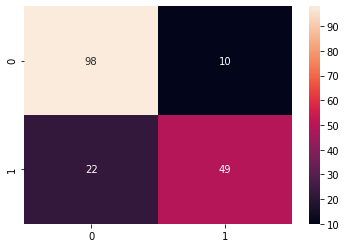

In [219]:
# 0,0: 53 => True Negative
# 0,1: 0  => False Positive 
# 1,0: 23 => False Negative 
# 1,1: 4  => True Positive 
sns.heatmap(confusion_matrix_dt, annot=True)

#### e) AUC - ROC Curve

In [220]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.798774126238915

## Decision Tree - k-Fold Cross-Validation

Now using kfold, a model validation technique which is not using my pre-trained model


In [221]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [222]:
kf_dt = KFold(n_splits=5,shuffle=True)  
cv_dt = cross_val_score(model, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.8024668884564685

# PART 2.2. Logistic Regression 

In [223]:
from sklearn.linear_model import LogisticRegression

#### LIBLINEAR -- A Library for Large Linear Classification
The solvers implemented in the class Logistic Regression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. According to Scikit Documentation: The “liblinear” solver was the one used by default for historical reasons before version 0.22. Since then, default use is lbfgs Algorithm.

In [224]:
model_lr = LogisticRegression(solver='liblinear')

In [225]:
# Training 
model_lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [226]:
# The predict() function enables us to predict the labels of the data values on the basis of the trained model.
# Note: predict() function accepts only a single argument which is the data to be tested.
y_pred_lg = model_lr.predict(X_test)
y_pred_lg

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

 ## Logistic Regression - Performance Measurement

#### a) Accuracy

In [121]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_lg = model_lr.score(X_test,Y_real) 
accuracy_lg 

0.8044692737430168

In [227]:
# Here is another way to find the accuracy score 
acc_lg = metrics.accuracy_score(Y_real,y_pred_lg)
acc_lg

0.8044692737430168

#### b) Precision

In [228]:
# Precision = true positive / true positive + false positive
precision_lg = metrics.precision_score(Y_real,y_pred_lg)  
precision_lg

0.8

#### c) Recall

In [229]:
# Recall = true positive / true positive + false negative
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg

0.676056338028169

#### d) Confusion matrix

In [230]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[96, 12],
       [23, 48]], dtype=int64)

<AxesSubplot:>

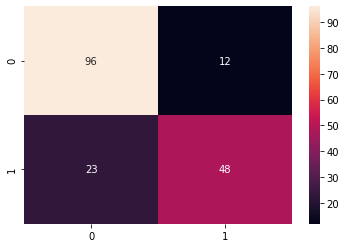

In [231]:
import seaborn as sns
sns.heatmap(cm_lg, annot=True)

#### e) AUC - ROC Curve

In [232]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg) # as the documentation explain, the main parameters are: y_true and y_score
auc_lg

0.7824726134585289

## Logistic Regression - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model

In [233]:
kf_lg = KFold(n_splits=5,shuffle=True)  

In [234]:
cv_lg = cross_val_score(model_lr, X, Y, cv=kf_lg)
np.mean(cv_lg)

0.7889900194589167

# PART 2.3. Support Vector Machines (SVC)   

In [235]:
from sklearn import svm

In [238]:
model_svc = svm.SVC(kernel="linear")
model_svc

SVC(kernel='linear')

In [239]:
# Training 
model_svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [242]:
# The predict() function enables us to predict the labels of the data values on the basis of the trained model.
# Note: predict() function accepts only a single argument which is the data to be tested.
Y_pred_svm = model_svc.predict(X_test)
Y_pred_svm

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

## Support Vector Classification (SVC) - Performance Measurement

 #### a) Accuracy

In [119]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_svc = model_svc.score(X_test,Y_real) 
accuracy_svc 

0.8044692737430168

In [243]:
# Here is another way to find the accuracy score
from sklearn import metrics
acc_svc = metrics.accuracy_score(Y_real,Y_pred_svm)
acc_svc

0.8044692737430168

#### b) Precision

In [244]:
# Precision = true positive / true positive + false positive
precision_svc = metrics.precision_score(Y_real,Y_pred_svm)  
precision_svc

0.8214285714285714

#### c) Recall

In [245]:
# Recall = true positive / true positive + false negative 
rec_svc = metrics.recall_score(Y_real, Y_pred_svm)
rec_svc

0.647887323943662

#### d) Confusion matrix

In [246]:
cm_svc = metrics.confusion_matrix(Y_real,Y_pred_svm)
cm_svc

array([[98, 10],
       [25, 46]], dtype=int64)

<AxesSubplot:>

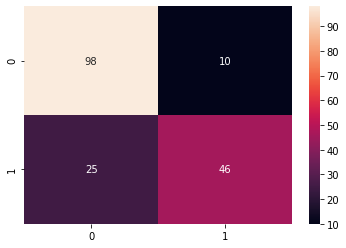

In [247]:
sns.heatmap(cm_svc, annot=True)

#### e) AUC - ROC Curve

In [248]:
auc_svc = metrics.roc_auc_score(Y_real, Y_pred_svm) # as the documentation explain, the main parameters are: y_true and y_score
auc_svc

0.7776473656755347

## Support Vector Classification (SVC) - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model



In [249]:
kf_svc = KFold(n_splits=5,shuffle=True)  

In [250]:
cv_svc = cross_val_score(model_svc, X, Y, cv=kf_svc)
np.mean(cv_lg)

0.7889900194589167

# PART 2.4. Random Forest  

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
model_rf = RandomForestClassifier().fit(X_train,Y_train)

In [253]:
y_pred_forest = model_rf.predict(X_test)
y_pred_forest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0], dtype=int64)

## Random Forest - Performance Measurement

#### a) Accuracy

In [254]:
# Accuracy = true negatives + true positives / true positives + false positives + true negatives + false negatives
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest 

0.8435754189944135

In [255]:
# Here is another way to find the accuracy score 
accuracy_forest = metrics.accuracy_score(Y_real,y_pred_forest)
accuracy_forest

0.8435754189944135

#### b) Precision

In [256]:
# Precision = true positive / true positive + false positive
precision_forest = metrics.precision_score(Y_real,y_pred_forest)  
precision_forest

0.8524590163934426

#### c) Recall

In [257]:
# Recall = true positive / true positive + false negative 
recall_forest = metrics.recall_score(Y_real, y_pred_forest)
recall_forest

0.7323943661971831

#### d) Confusion matrix

In [258]:
cm_forest = metrics.confusion_matrix(Y_real,y_pred_forest)
cm_forest

array([[99,  9],
       [19, 52]], dtype=int64)

<AxesSubplot:>

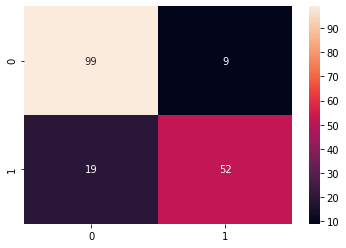

In [259]:
sns.heatmap(cm_forest, annot=True)

#### e) AUC - Roc Curve

In [260]:
auc_forest = metrics.roc_auc_score(Y_real, y_pred_forest) # as the documentation explain, the main parameters are: y_true and y_score
auc_forest

0.8245305164319248

## Random Forest - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model

In [261]:
kf_forest = KFold(n_splits=5,shuffle=True)  

In [262]:
cv_forest = cross_val_score(model_rf, X, Y, cv=kf_forest)
np.mean(cv_forest)

0.8080660347749671

## PART 2.5. KNN (K-Nearest Neighbors)

In [263]:
from sklearn.neighbors import KNeighborsRegressor 

In [264]:
knn_model = KNeighborsRegressor()
knn_model

KNeighborsRegressor()

In [265]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [266]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0.2, 0. , 0. , 0.2, 0.4, 0.4, 0.4, 0.2, 0.8, 0.4, 0.2, 0.2, 0. ,
       0. , 0.6, 0.8, 0.4, 0.6, 0.2, 1. , 0.2, 0. , 0.6, 1. , 0.2, 0.6,
       0.4, 0.4, 0. , 0.2, 1. , 0. , 0.2, 0.6, 0.6, 0. , 0. , 0.2, 0.2,
       0. , 0. , 0. , 1. , 0. , 0.6, 0.2, 0.2, 0.4, 1. , 0. , 0.2, 0.8,
       0. , 0.4, 0.6, 0.2, 0.6, 0.2, 1. , 1. , 1. , 0.4, 0.8, 0.4, 0.4,
       0.2, 0.2, 0.4, 0.2, 0.8, 0. , 1. , 0. , 0. , 0.6, 0.2, 1. , 1. ,
       0.6, 0.6, 0.6, 0. , 0.4, 0.8, 0.2, 0.4, 0.6, 0.6, 0.6, 0. , 0.2,
       0.8, 0.6, 0.2, 0.4, 0.6, 0.8, 0. , 1. , 0.4, 0. , 1. , 0.4, 0.2,
       0.2, 0.6, 0.2, 0. , 0.4, 0.6, 0.4, 0.6, 0.2, 0. , 0.2, 0.2, 0.2,
       0. , 0.2, 0. , 1. , 0.2, 0.4, 0. , 0.4, 0. , 0.2, 0.6, 0.2, 0.2,
       0.2, 0.6, 0.6, 0. , 0.4, 0. , 0. , 0. , 0.4, 0.6, 0. , 0.4, 0. ,
       0.2, 1. , 0.2, 1. , 0. , 0.2, 0.4, 1. , 1. , 0.2, 0.6, 0. , 0.2,
       1. , 1. , 0.8, 0.2, 0.2, 0.2, 0. , 0.6, 0.6, 0.8, 0.2, 0.4, 1. ,
       0.2, 0.4, 0. , 0.4, 0. , 0.2, 1. , 0. , 0. , 0. ])

## K-Nearest Neighbors - Performance Measurement

In [267]:
# Classification metrics can't handle a mix of binary and continuous targets
# Here I must apply method round() from numpy 
import numpy as np

In [268]:
# its criteria is to round to 1 when higher than 0.5
rounding = np.round(y_pred_knn)  

#### a) Accuracy

In [269]:
#NOTE = no parametro tem q ser o y real e depois o pred
acc_knn = metrics.accuracy_score(Y_real,rounding)  
acc_knn 

0.7374301675977654

#### b) Precision

In [270]:
 # Precision = true positive / true positive + false positive
precision_knn = metrics.precision_score(Y_real,rounding)  
precision_knn

0.7

#### c) Recall

In [271]:
# Recall = true positive / true positive + false negative 
recall_knn = metrics.recall_score(Y_real, rounding)
recall_knn

0.5915492957746479

#### d) Confusion Matrix

In [272]:
cm_knn = metrics.confusion_matrix(Y_real, rounding)
cm_knn

array([[90, 18],
       [29, 42]], dtype=int64)

<AxesSubplot:>

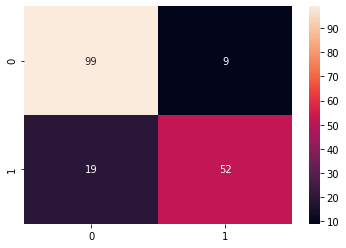

In [273]:
sns.heatmap(cm_forest, annot=True)

#### e) AUC - ROC Curve 

In [274]:
auc_knn = metrics.roc_auc_score(Y_real, rounding) # as the documentation explain, the main parameters are: y_true and y_score
auc_knn

0.7124413145539907

## K-Nearest Neighbors - k-Fold Cross-Validation
Now using kfold, a model validation technique which is not using my pre-trained model

In [275]:
kf_neighbors = KFold(n_splits=5,shuffle=True)  

In [276]:
cv_neighbors = cross_val_score(knn_model, X, Y, cv=kf_neighbors)
np.mean(cv_neighbors)

0.28765620133288194

# PART 3 - Valuation Analysis 

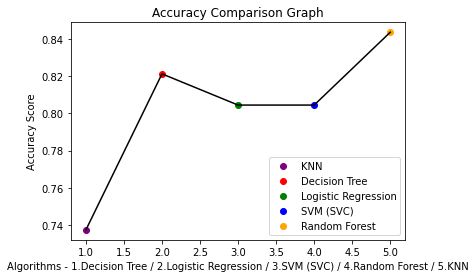

In [277]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Logistic Regression / 3.SVM (SVC) / 4.Random Forest / 5.KNN")

y = [acc_knn,accuracy_dt,accuracy_lg,acc_svc,accuracy_forest]

plt.plot([1,2,3,4,5],y, color = "black")


plt.scatter(1,acc_knn, marker="o", color = "purple",label = "KNN")

plt.scatter(2,accuracy_dt, marker="o", color="red", label="Decision Tree")

plt.scatter(3,accuracy_lg, marker="o", color="green", label="Logistic Regression")

plt.scatter(4,acc_svc, marker="o", color="blue", label="SVM (SVC)")

plt.scatter(5,accuracy_forest, marker="o", color = "orange",label = "Random Forest")

 
plt.legend()
plt.show()